In [1]:
import os

In [2]:
import json

In [3]:
json_files = os.listdir("./tmp/docker/json_files/")

In [4]:
files = []
for i in json_files:
    with open(f"./tmp/docker/json_files/{i}", "r") as f:
        files.append(json.load(f))


In [5]:
import matplotlib.pyplot as plt

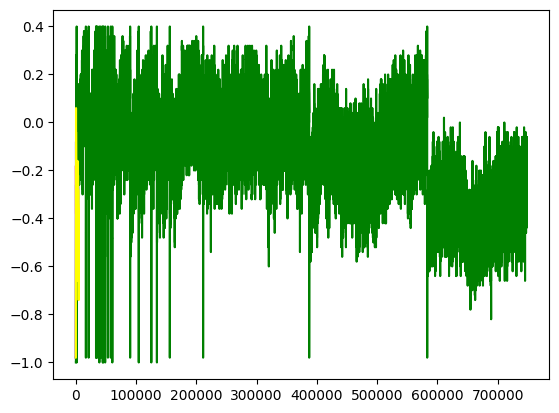

In [6]:
plt.plot(files[0]["avg_scores"], color="blue")
plt.plot(files[1]["avg_scores"], color="red")
plt.plot(files[2]["avg_scores"], color="green")
plt.plot(files[3]["avg_scores"], color="yellow")

In [7]:
import numpy as np

In [8]:
gpu_times = np.array(files[0]["episodes_time"])
cpu_times = np.array(files[1]["episodes_time"])

In [9]:
print("gpu times: ", np.mean(gpu_times))
print("cpu times: ", np.mean(cpu_times))
print(np.mean(cpu_times)/np.mean(gpu_times))

gpu times:  2.1419185981625004
cpu times:  2.7447232514414295
1.2814321019463861


In [10]:
import json

def read_data_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            # Assuming the JSON file contains a key named 'avg_scores'
            avg_scores = data.get('avg_scores', [])
            return avg_scores
    except Exception as e:
        # print(f"Error reading data from {file_path}: {str(e)}")
        return []  # Return an empty list if there's an error reading the file


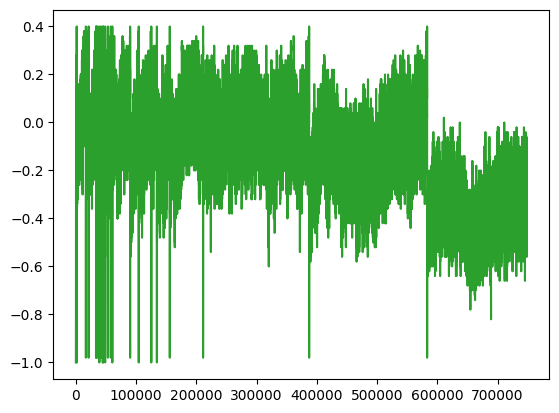

In [11]:
import os
import matplotlib.pyplot as plt
import time
import watchdog.events
import watchdog.observers
from IPython.display import display, clear_output

# Create a function to set up the initial plot
def create_initial_plot():
    fig, ax = plt.subplots()
    ax.set_title("Dynamic Plot")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    return fig, ax

# Create a function to update the plot
def update_plot(fig, ax):
    ax.clear()
    for file_data in files:
        color = file_data["color"]
        # avg_scores = file_data["avg_scores"][-1000:]
        avg_scores = file_data["avg_scores"]
        file_path = file_data["path"]
        ax.plot(avg_scores, color=color, label=file_path)
    # ax.legend()
    display(fig)
    clear_output(wait=True)  # Clear the previous output to display the updated chart

# Initialize a file change handler
class MyHandler(watchdog.events.FileSystemEventHandler):
    def on_modified(self, event):
        for file_data in files:
            if event.src_path == file_data["path"]:
                file_data["avg_scores"] = read_data_from_file(file_data["path"])
        update_plot(fig, ax)  # Trigger the update when any file in the directory changes
        time.sleep(1)

# Create a watchdog observer to watch the directory for changes
directory_to_watch = "tmp/docker/json_files/"  # Replace with your directory's path
event_handler = MyHandler()
observer = watchdog.observers.Observer()
observer.schedule(event_handler, directory_to_watch, recursive=False)
observer.start()

# Discover and prepare a list of all files in the directory
files = []
for filename in os.listdir(directory_to_watch):
    if os.path.isfile(os.path.join(directory_to_watch, filename)):
        file_data = {
            "path": os.path.join(directory_to_watch, filename),
            "avg_scores": [],
            "color": None  # You can set color here if needed
        }
        files.append(file_data)

# Set up the initial plot
fig, ax = create_initial_plot()

# Periodically update the plot
while True:
    try:
        time.sleep(1)
    except KeyboardInterrupt:
        observer.stop()
        break
observer.join()
